In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir("C:\\code\\activ")

In [3]:
df = pd.read_excel('./documents/feature.xlsx')

In [4]:
ACTION_NUM = 5

In [5]:
df.to_numpy().shape

(431, 22)

In [6]:
def make_dataset(training_data, t=12, k=85, test_size=0.2):
    scaler = MinMaxScaler()
    training_data = scaler.fit_transform(training_data.to_numpy()[:,1::])

    p = []
    for i in range(ACTION_NUM):
        X = []
        y = []
        for j in range(k):
            idx = rand.randint(0, len(training_data)-t-2)
            X.append(training_data[idx:idx+t])
            y.append(training_data[idx+t+1])

        X = np.array(X)
        y = np.array(y)
        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
        p.append([X_train,X_test,y_train,y_test])

    return p
p = make_dataset(df)

In [7]:
class model_(tf.keras.Model):
    def __init__(self):
        super(model_, self).__init__()
        self.d1 = tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True)
        self.d2 = tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True)
        self.d3 = tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=False)
        self.d4 = tf.keras.layers.Dense(units=21, activation='linear')
    def call(self, inputs):
        x = self.d1(inputs)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)

        return x

In [8]:
model_0 = model_()
model_1 = model_()
model_2 = model_()
model_3 = model_()
model_4 = model_()

In [9]:
model_list = [model_0, model_1, model_2, model_3, model_4]

In [10]:
for i in range(5):
    model_list[i].build(input_shape=(1, 12, 21))
    model_list[i].compile(optimizer='adam', loss='mse')

In [11]:
for i, model in enumerate(model_list):
    X_train, X_test, y_train, y_test = p[i][0], p[i][1], p[i][2], p[i][3]
    hist = model.fit(X_train, y_train, epochs=5000, batch_size=64, validation_data=(X_test, y_test), verbose=1, 
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, verbose=1)])

Epoch 1/5000
2/2 [==============================] - 9s 2s/step - loss: 0.2671 - val_loss: 0.1813
Epoch 2/5000
2/2 [==============================] - 0s 35ms/step - loss: 0.1788 - val_loss: 0.0726
Epoch 3/5000
2/2 [==============================] - 0s 36ms/step - loss: 0.0786 - val_loss: 0.0642
Epoch 4/5000
2/2 [==============================] - 0s 35ms/step - loss: 0.0718 - val_loss: 0.0383
Epoch 5/5000
2/2 [==============================] - 0s 37ms/step - loss: 0.0428 - val_loss: 0.0304
Epoch 6/5000
2/2 [==============================] - 0s 36ms/step - loss: 0.0322 - val_loss: 0.0346
Epoch 7/5000
2/2 [==============================] - 0s 35ms/step - loss: 0.0347 - val_loss: 0.0277
Epoch 8/5000
2/2 [==============================] - 0s 38ms/step - loss: 0.0281 - val_loss: 0.0195
Epoch 9/5000
2/2 [==============================] - 0s 36ms/step - loss: 0.0205 - val_loss: 0.0164
Epoch 10/5000
2/2 [==============================] - 0s 34ms/step - loss: 0.0178 - val_loss: 0.0151
Epoch 11/50

In [12]:
for i in range(5):
    model_list[i].save('./model/action_net{0}'.format(i))
    print(i)

INFO:tensorflow:Assets written to: ./model/action_net0\assets


INFO:tensorflow:Assets written to: ./model/action_net0\assets


0


INFO:tensorflow:Assets written to: ./model/action_net1\assets


INFO:tensorflow:Assets written to: ./model/action_net1\assets


1


INFO:tensorflow:Assets written to: ./model/action_net2\assets


INFO:tensorflow:Assets written to: ./model/action_net2\assets


2


INFO:tensorflow:Assets written to: ./model/action_net3\assets


INFO:tensorflow:Assets written to: ./model/action_net3\assets


3


INFO:tensorflow:Assets written to: ./model/action_net4\assets


INFO:tensorflow:Assets written to: ./model/action_net4\assets


4


In [13]:
dnn = tf.keras.models.load_model('./model/dnn.h5')

In [14]:
a = df.iloc[:,1:22].to_numpy()
scaler = MinMaxScaler()
a = scaler.fit_transform(a)
b = []
for i in range(0, len(a)-12, 12):
    b.append(a[i:i+12])

b = np.array(b).reshape(len(b), 12, 21)

d_x_shaft = [i for i in range(0, len(a), 12)]
d_y = []
for i in range(0, len(a), 12):
    d_y.append(a[i].reshape(1, 21))

y = []
for i in d_y:
    y.append(dnn.predict(i, verbose=0)[0][0])

del y[0]

c_list = ['b', 'g', 'r', 'y', 'm']

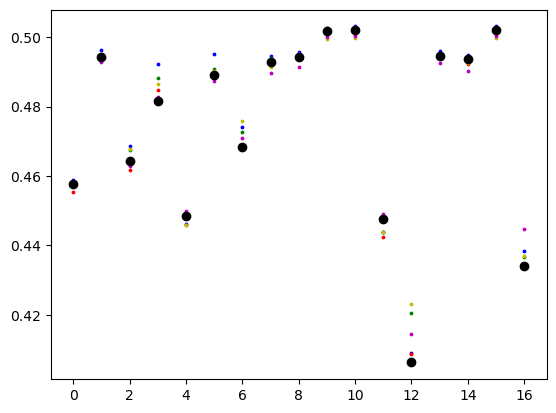

In [16]:
l_x_shaft = [i for i in range(len(X_test))]

for i in range(5):
    plt.scatter(l_x_shaft, dnn.predict(model_list[i](X_test), verbose=0), c=c_list[i], s=3)

plt.scatter(l_x_shaft, dnn.predict(y_test, verbose=0), c='black')
plt.show()

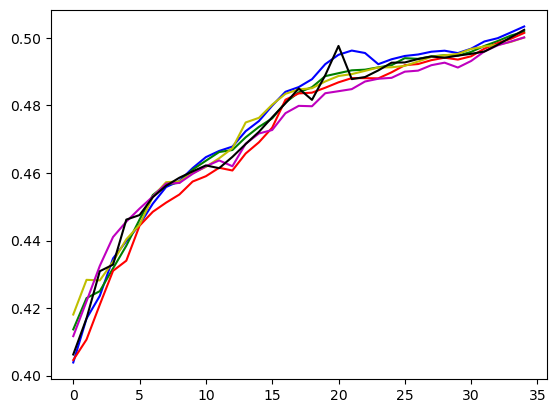

In [17]:
l_x_shaft = [i for i in range(len(b))]

for i in range(5):
    plt.plot(l_x_shaft, dnn.predict(model_list[i](b), verbose=0), c=c_list[i])

plt.plot(l_x_shaft, y, c='black')
plt.show()